In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import re,string,unicodedata
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
from os import path
import scipy as sp
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Adding target column with respective lables

In [5]:
df_fake['target'] = 'fake'

In [6]:
df_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [7]:
df_true['target'] = 'true'
df_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


## Stacking the dataframes

In [8]:
df_merged = pd.concat([df_fake, df_true], ignore_index=True, axis=0)
df_merged.head()
df_merged.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


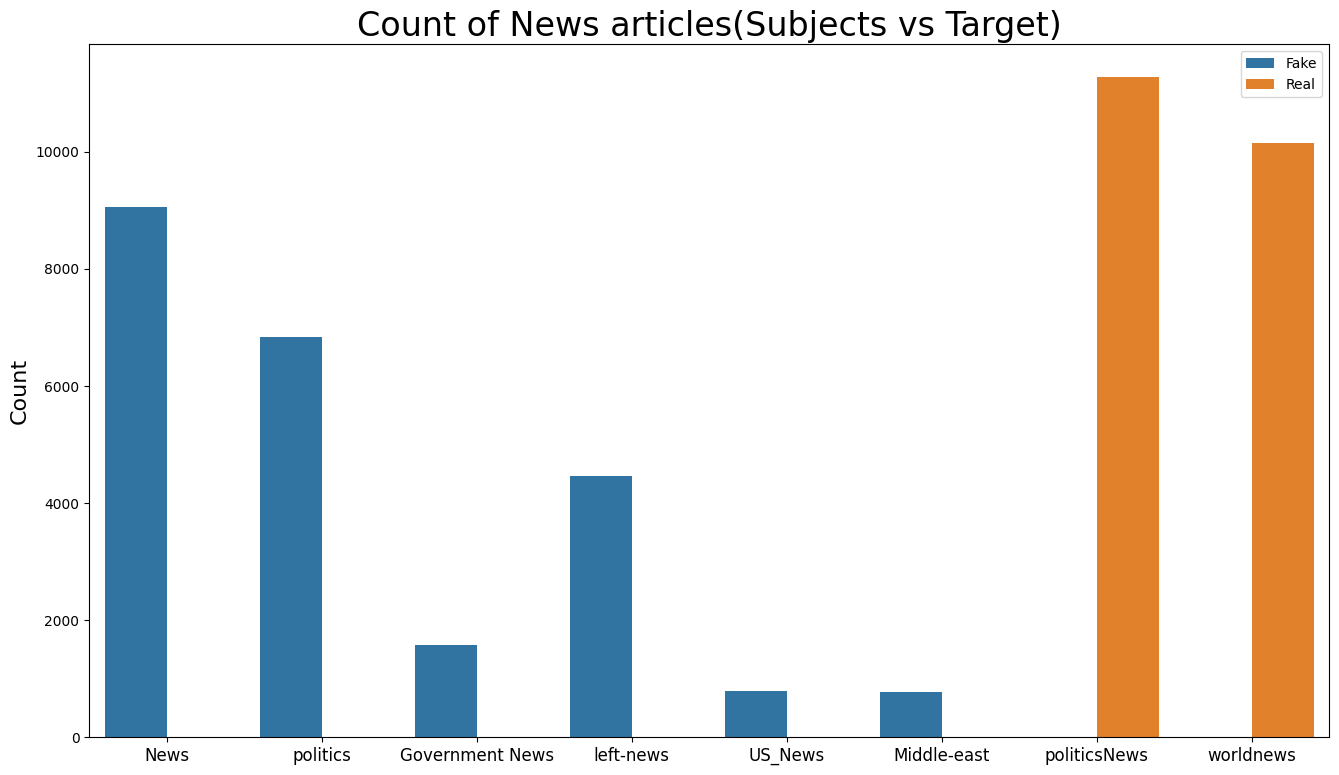

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='target', data=df_merged)

plt.title('Count of News articles(Subjects vs Target)', fontsize=24)
plt.ylabel('Count', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.legend(['Fake', 'Real'])

### Looking at the plot above if we included subject model would quickly realize which subjects correspond to real or fake news so dropping the 'Subject' column

## Wordclouds

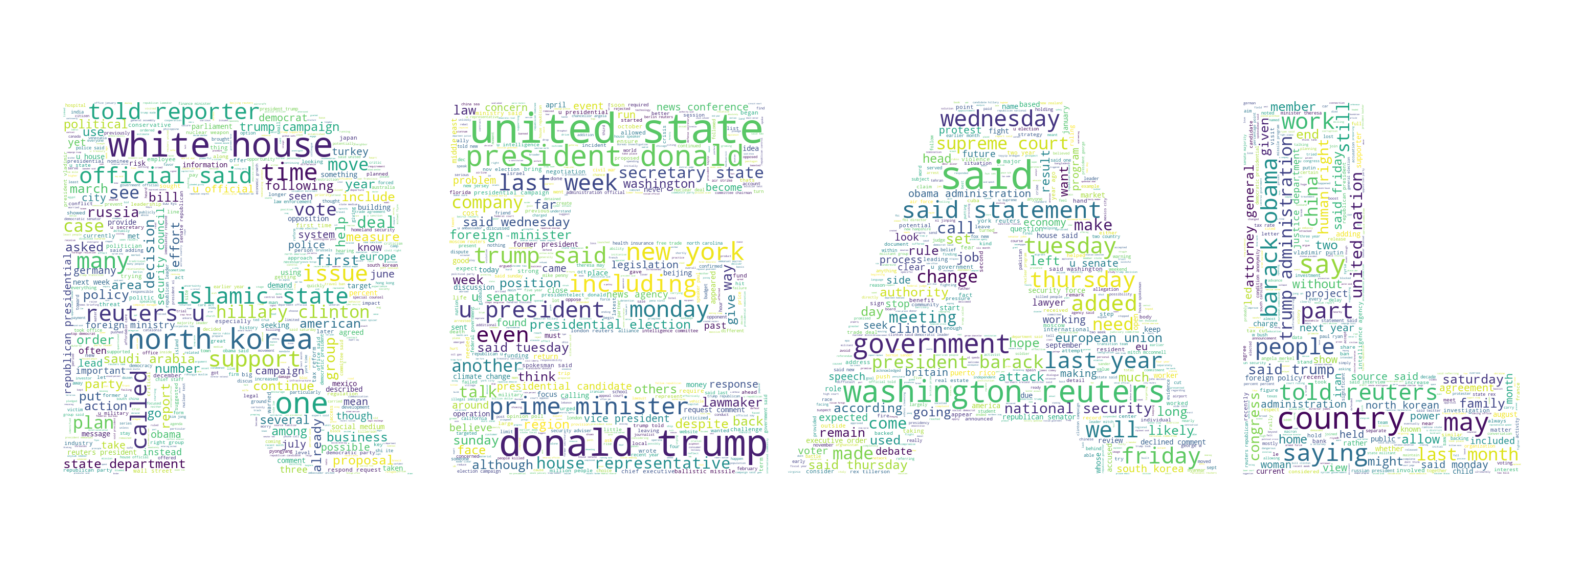

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df_merged[df_merged.target == 'true'].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask / color image taken from
coloring = np.array(Image.open(path.join(d, "real_news.jpeg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words = 2000 , width = 1600 , height = 800, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# # This bit of code is used to create a high quality exported image
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("real_news_nlp_word_cloud.png", bbox_inches='tight', dpi=600)

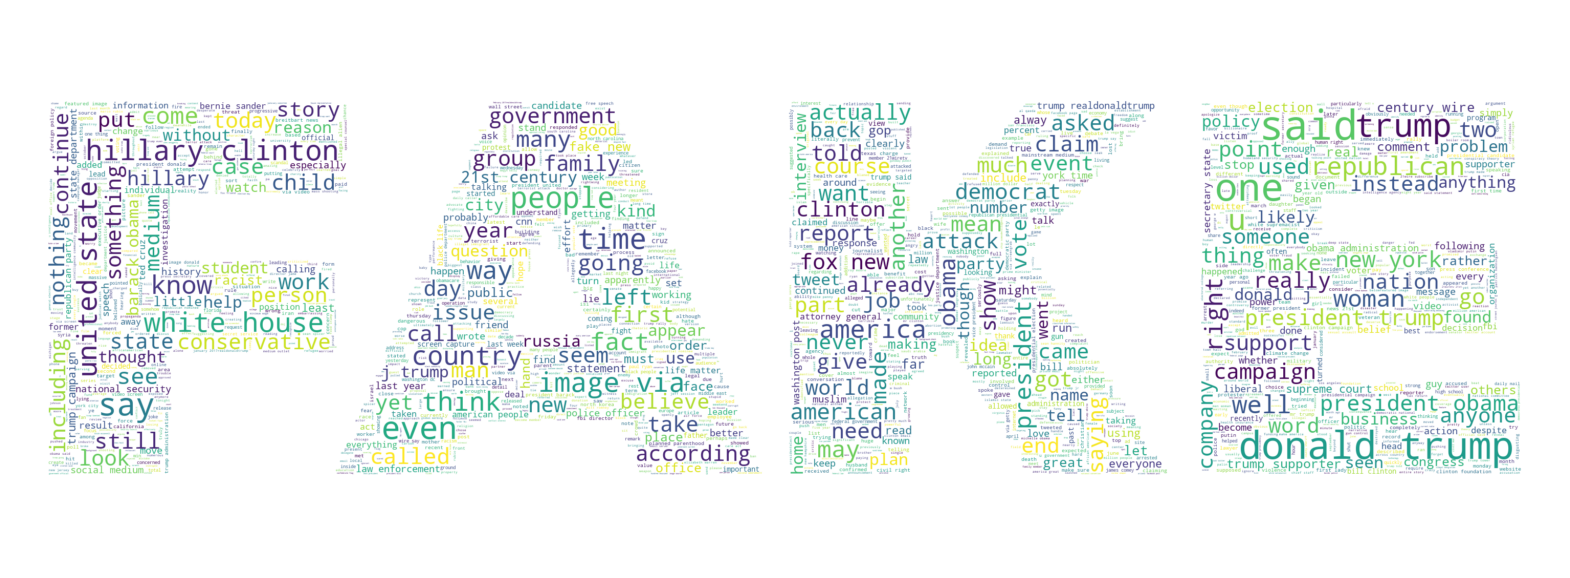

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df_merged[df_merged.target == 'fake'].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask / color image taken from
coloring = np.array(Image.open(path.join(d, "fake_news.jpeg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# # This bit of code is used to create a high quality exported image
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("fake_news_nlp_word_cloud.png", bbox_inches='tight', dpi=600)

## Parsing dates and removing text rows from date column

In [12]:
from datetime import datetime
def parse_date(text):
    for fmt in ('%B %d, %Y', '%b %d, %Y', '%d-%b-%y', ):
        try:
            return datetime.strptime(text, fmt)
        except:
            pass
    print(text)
    return np.nan

In [13]:
test = df_merged['date'].apply(lambda x: parse_date(x.strip()))

https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg


In [14]:
test.isna().sum()

10

In [15]:
df_merged['date'] =  df_merged['date'].apply(lambda x: parse_date(x.strip()))

https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]
https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg


In [16]:
df_merged[df_merged['date'].isna()]

,title,text,subject,date,target
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,fake
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,fake
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,fake
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,fake
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,fake
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,fake
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,fake
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,fake
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,fake
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,fake


In [17]:
df_merged.dropna(inplace=True)

In [18]:
df_merged.shape

(44888, 5)

## Extracting date, month and year from date column

In [19]:
df_merged['year'] = pd.DatetimeIndex(df_merged['date']).year
df_merged['month'] = pd.DatetimeIndex(df_merged['date']).month

df_merged.head()

,title,text,subject,date,target,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,2017,12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,2017,12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,2017,12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,2017,12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,2017,12


In [20]:
cols=["year","month"]
df_merged['month_year'] = df_merged[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [21]:
df_merged.head()

,title,text,subject,date,target,year,month,month_year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,2017,12,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,2017,12,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,2017,12,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,2017,12,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,2017,12,2017-12


## Text Data Cleaning


In [22]:
import re
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text) # words containing digit
    text = re.sub('\[.*?\]', '', text) # will sub "[?]" with a blank str in texts, ? ensures stop at first occurence of bracket 
    text = re.sub('https?:\/\/\S+|www\.\S+', '', text)# ignoring links
    text = re.sub('<.*?>+', '', text) #will sub "<?>" with a blank str in texts
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  #remove punctuation
    text = re.sub('\n', '', text) #remove new line
    return text

df_merged['text'] = df_merged['text'].apply(lambda x : clean_text(x))


In [23]:
df_merged.text.head()

0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday it was revealed that former milwauke...
3    on christmas day donald trump announced that h...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object

## Tokenization

In [24]:
from nltk.tokenize import word_tokenize
df_merged['tokens'] = df_merged['text'].apply(lambda x : word_tokenize(x))


In [25]:
df_merged.tokens.head()

0    [donald, trump, just, couldn, t, wish, all, am...
1    [house, intelligence, committee, chairman, dev...
2    [on, friday, it, was, revealed, that, former, ...
3    [on, christmas, day, donald, trump, announced,...
4    [pope, francis, used, his, annual, christmas, ...
Name: tokens, dtype: object

## Removal of stop words

In [26]:
from nltk.corpus import stopwords
stop_words_set = set(stopwords.words('english'))

In [27]:
df_merged['tokens'] =df_merged['tokens'].apply(lambda x:[word for word in x if word not in stop_words_set])


In [28]:
df_merged.tokens.head()

0    [donald, trump, wish, americans, happy, new, y...
1    [house, intelligence, committee, chairman, dev...
2    [friday, revealed, former, milwaukee, sheriff,...
3    [christmas, day, donald, trump, announced, wou...
4    [pope, francis, used, annual, christmas, day, ...
Name: tokens, dtype: object

In [29]:
df_merged

,title,text,subject,date,target,year,month,month_year,tokens
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,fake,2017,12,2017-12,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,fake,2017,12,2017-12,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,2017-12-30,fake,2017,12,2017-12,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,2017-12-29,fake,2017,12,2017-12,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,fake,2017,12,2017-12,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday welco...,worldnews,2017-08-22,true,2017,8,2017-8,"[brussels, reuters, nato, allies, tuesday, wel..."
44894,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of legal...,worldnews,2017-08-22,true,2017,8,2017-8,"[london, reuters, lexisnexis, provider, legal,..."
44895,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused soviet...,worldnews,2017-08-22,true,2017,8,2017-8,"[minsk, reuters, shadow, disused, sovietera, f..."
44896,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state car...,worldnews,2017-08-22,true,2017,8,2017-8,"[moscow, reuters, vatican, secretary, state, c..."


## Dropping Title, date and subject

In [30]:
df_merged = df_merged.drop(['title', 'date', 'subject'], axis=1)

In [31]:
df_merged.head()

,text,target,year,month,month_year,tokens
0,donald trump just couldn t wish all americans ...,fake,2017,12,2017-12,"[donald, trump, wish, americans, happy, new, y..."
1,house intelligence committee chairman devin nu...,fake,2017,12,2017-12,"[house, intelligence, committee, chairman, dev..."
2,on friday it was revealed that former milwauke...,fake,2017,12,2017-12,"[friday, revealed, former, milwaukee, sheriff,..."
3,on christmas day donald trump announced that h...,fake,2017,12,2017-12,"[christmas, day, donald, trump, announced, wou..."
4,pope francis used his annual christmas day mes...,fake,2017,12,2017-12,"[pope, francis, used, annual, christmas, day, ..."


In [32]:
df_merged.isna().sum() #Checking NA values

text          0
target        0
year          0
month         0
month_year    0
tokens        0
dtype: int64

In [33]:
df_merged = df_merged.drop(['text'], axis=1)

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/jhaanvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jhaanvi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Lemmatization

In [35]:

from nltk.stem import WordNetLemmatizer

def lemmatize_words(words):
    lemmatized_words = []
    wn_lemmatizer = WordNetLemmatizer()
    for word in words:
       result = wn_lemmatizer.lemmatize(word)
       lemmatized_words.append(result)
    return " ".join(lemmatized_words)


In [36]:
df_merged.head()

,target,year,month,month_year,tokens
0,fake,2017,12,2017-12,"[donald, trump, wish, americans, happy, new, y..."
1,fake,2017,12,2017-12,"[house, intelligence, committee, chairman, dev..."
2,fake,2017,12,2017-12,"[friday, revealed, former, milwaukee, sheriff,..."
3,fake,2017,12,2017-12,"[christmas, day, donald, trump, announced, wou..."
4,fake,2017,12,2017-12,"[pope, francis, used, annual, christmas, day, ..."


In [37]:
df_merged['tokens'] = df_merged['tokens'].apply(lemmatize_words)

In [38]:
def load_words():
    with open('english-words.csv') as word_file:
        english_words = set(word_file.read().lower().split())
    return english_words
english_words = load_words()
print(len(english_words))

466546


## Removing non dictionary words from text

In [39]:
def remove_non_english_words(text):
    result = []
    for word in text.split():
        if word in english_words or not word.isalpha():
            result.append(word)
    
    return " ".join(result)

In [40]:
# testing function
print(df_merged['tokens'].values[0])
print("\n\n")
print(remove_non_english_words(df_merged['tokens'].values[0]))

donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval december us word hater new yea

In [41]:
df_merged['tokens'] = df_merged['tokens'].apply(remove_non_english_words)

In [42]:
df_merged.head()


,target,year,month,month_year,tokens
0,fake,2017,12,2017-12,donald trump wish american happy new year leav...
1,fake,2017,12,2017-12,house intelligence committee chairman devin nu...
2,fake,2017,12,2017-12,friday revealed former milwaukee sheriff david...
3,fake,2017,12,2017-12,christmas day donald trump announced would bac...
4,fake,2017,12,2017-12,pope francis used annual christmas day message...


## Dummify Date columns

In [43]:
df_dummy=pd.get_dummies(data=df_merged, columns = ['year','month','month_year'])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score

In [45]:
X = df_dummy.drop(columns='target')
y = df_dummy['target'].apply(lambda x: 1 if x == 'true' else 0)

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=100)

## Applying TF-IDF to tokens

In [46]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2), max_features=200000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['tokens'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['tokens'])

In [47]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

## Applying BOW to tokens

In [48]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2), max_features=200000)
X_train_bow = count_vectorizer.fit_transform(X_train['tokens'])
X_test_bow = count_vectorizer.transform(X_test['tokens'])

In [49]:
bow_feature_names = count_vectorizer.get_feature_names_out()

## Applying LDA to BOW

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", n_jobs = -1, random_state = 100)
document_topics = lda.fit_transform(X_train_bow)
testing_features = lda.transform(X_test_bow)

## Find Topics

In [51]:
lda.components_

array([[ 0.19722304,  0.10001262,  0.1       , ...,  0.10000012,
         0.10000167,  0.1000003 ],
       [ 0.10005533,  0.10000045,  0.1       , ...,  0.10000425,
         2.38973429,  0.10000274],
       [ 0.10000103,  0.10002114,  0.10012248, ...,  0.10000115,
         0.10000561,  0.10000182],
       ...,
       [ 7.73437665,  0.10002254,  0.1       , ...,  0.1       ,
         3.0278881 ,  0.10001139],
       [ 0.10000578,  0.10011289,  6.09963184, ...,  4.595449  ,
        16.80459614, 10.68059795],
       [ 0.10007439,  0.10001387,  0.10008276, ...,  0.10002694,
         0.10001721,  0.10000965]])

### Create Topic Function

In [52]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    # for each topic (a row in the components_), sort the features (ascending).
    # Invert rows with [:, ::-1] to make sorting descending
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [53]:
feature_names = np.array(count_vectorizer.get_feature_names_out())
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print_topics(topics=range(10), feature_names=feature_names, components = lda.components_,
                        topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
trump         court         trump         clinton       said          
president     state         said          email         north         
donald        law           president     fbi           korea         
donald trump  said          state         investigation reuters       
people        school        russia        said          state         
said          right         united        hillary       china         
republican    woman         reuters       information   north korea   
like          judge         washington    campaign      people        
image         people        house         department    military      
obama         supreme       united state  committee     year          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
said

## Dropping tokens from dataframe

In [54]:
X_train.drop(columns=['tokens'], inplace=True)
X_test.drop(columns=['tokens'], inplace=True)

In [55]:
X_train.head()

,year_2015,year_2016,year_2017,year_2018,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,month_year_2015-10,month_year_2015-11,month_year_2015-12,month_year_2015-3,month_year_2015-4,month_year_2015-5,month_year_2015-6,month_year_2015-7,month_year_2015-8,month_year_2015-9,month_year_2016-1,month_year_2016-10,month_year_2016-11,month_year_2016-12,month_year_2016-2,month_year_2016-3,month_year_2016-4,month_year_2016-5,month_year_2016-6,month_year_2016-7,month_year_2016-8,month_year_2016-9,month_year_2017-1,month_year_2017-10,month_year_2017-11,month_year_2017-12,month_year_2017-2,month_year_2017-3,month_year_2017-4,month_year_2017-5,month_year_2017-6,month_year_2017-7,month_year_2017-8,month_year_2017-9,month_year_2018-2
41196,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19381,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25153,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10087,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3915,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test.head()

,year_2015,year_2016,year_2017,year_2018,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,month_year_2015-10,month_year_2015-11,month_year_2015-12,month_year_2015-3,month_year_2015-4,month_year_2015-5,month_year_2015-6,month_year_2015-7,month_year_2015-8,month_year_2015-9,month_year_2016-1,month_year_2016-10,month_year_2016-11,month_year_2016-12,month_year_2016-2,month_year_2016-3,month_year_2016-4,month_year_2016-5,month_year_2016-6,month_year_2016-7,month_year_2016-8,month_year_2016-9,month_year_2017-1,month_year_2017-10,month_year_2017-11,month_year_2017-12,month_year_2017-2,month_year_2017-3,month_year_2017-4,month_year_2017-5,month_year_2017-6,month_year_2017-7,month_year_2017-8,month_year_2017-9,month_year_2018-2
8189,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17579,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
31406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41614,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21887,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
date_feature_columns = X_train.columns.to_numpy()

In [58]:
date_feature_columns

array(['year_2015', 'year_2016', 'year_2017', 'year_2018', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'month_year_2015-10', 'month_year_2015-11', 'month_year_2015-12',
       'month_year_2015-3', 'month_year_2015-4', 'month_year_2015-5',
       'month_year_2015-6', 'month_year_2015-7', 'month_year_2015-8',
       'month_year_2015-9', 'month_year_2016-1', 'month_year_2016-10',
       'month_year_2016-11', 'month_year_2016-12', 'month_year_2016-2',
       'month_year_2016-3', 'month_year_2016-4', 'month_year_2016-5',
       'month_year_2016-6', 'month_year_2016-7', 'month_year_2016-8',
       'month_year_2016-9', 'month_year_2017-1', 'month_year_2017-10',
       'month_year_2017-11', 'month_year_2017-12', 'month_year_2017-2',
       'month_year_2017-3', 'month_year_2017-4', 'month_year_2017-5',
       'month_year_2017-6', 'month_year_2017-7', 'month_year_2017-8',
       'month

## Converting Dataframe to numpy array

In [59]:
X_train_mat = X_train.to_numpy()
X_test_mat = X_test.to_numpy()

In [60]:
X_train_mat

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

## Joining numpy array with dates column with TFIDF/BOW/LDA output

In [61]:
X_train_final_tfidf = sp.sparse.hstack((X_train_mat,X_train_tfidf))
X_test_final_tfidf = sp.sparse.hstack((X_test_mat,X_test_tfidf))

In [62]:
X_train_final_bow = sp.sparse.hstack((X_train_mat,X_train_bow))
X_test_final_bow = sp.sparse.hstack((X_test_mat,X_test_bow))

In [63]:
X_train_final_lda = np.hstack((X_train_mat,document_topics))
X_test_final_lda = np.hstack((X_test_mat,testing_features))

## Create Feature Importance function


In [64]:
def get_feature_importance(feature_names, coefs):
    zipped = zip(feature_names,coefs)
    df = pd.DataFrame(zipped, columns=['Feature', 'Value'])
    df['abs_value'] = df['Value'].apply(lambda x : abs(x))
    df['colors'] = df['Value'].apply(lambda x: "green" if x > 0 else "red")
    df = df.sort_values("abs_value", ascending=False)

    print(df.head())
    fig = plt.subplots(1,1, figsize=(16,9))
    ax = sns.barplot(x="Feature", y="Value", data=df.head(25), palette=df.head(25)["colors"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
    ax.set_title("Top 25 features", fontsize=25)
    ax.set_ylabel("Coef", fontsize=22)
    ax.set_xlabel("Feature Name", fontsize=22)
    ax.bar_label(ax.containers[0], fmt='%.3f')

## Create Scores Function


In [65]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train),target_names = ['Fake','Real'])))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test), target_names = ['Fake','Real'])))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  
        y_pred_proba = clf.predict_proba(X_test)[::,1] 
        print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_proba)))

## XG boost TFIDF

In [66]:
import xgboost as xgb

In [67]:
xgb_clf_tfidf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [68]:
xgb_clf_tfidf.fit(X_train_final_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [69]:
y_pred = xgb_clf_tfidf.predict(X_test_final_tfidf)

In [70]:
y_predict = xgb_clf_tfidf.predict_proba(X_test_final_tfidf)[:, 1]

In [71]:
auc_roc_score = roc_auc_score(y_test, y_predict)
print("AUC-ROC score:", auc_roc_score)

AUC-ROC score: 0.9999086483052246


In [72]:
print_score(xgb_clf_tfidf,X_train_final_tfidf, y_train, X_test_final_tfidf, y_test, train=False)

Test Result:

accuracy score: 0.9972

Classification Report: 
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4694
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix: 
 [[4672   22]
 [   3 4281]]

ROC AUC score: 0.9999086483052246


In [73]:
print(classification_report(y_test, y_pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4694
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



## XG boost BOW

In [74]:
xgb_clf_BOW = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=1.5, random_state=42)

In [75]:
xgb_clf_BOW.fit(X_train_final_bow, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [76]:
y_pred = xgb_clf_BOW.predict(X_test_final_bow)

In [77]:
y_predict = xgb_clf_BOW.predict_proba(X_test_final_bow)[:, 1]

In [78]:
auc_roc_score = roc_auc_score(y_test, y_predict)
print("AUC-ROC score:", auc_roc_score)

AUC-ROC score: 0.9997134381376468


In [79]:
print(classification_report(y_test, y_pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4694
        Real       1.00      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



In [80]:
print_score(xgb_clf_BOW,X_train_final_bow,y_train,X_test_final_bow,y_test,train=False)

Test Result:

accuracy score: 0.9974

Classification Report: 
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4694
        Real       1.00      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix: 
 [[4677   17]
 [   6 4278]]

ROC AUC score: 0.9997134381376468


## XG boost LDA

In [81]:
xgb_clf_lda = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [82]:
xgb_clf_lda.fit(X_train_final_lda, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [83]:
y_pred = xgb_clf_lda.predict(X_test_final_lda)

In [84]:
print_score(xgb_clf_lda, X_train_final_lda, y_train, X_test_final_lda, y_test, train=False)

Test Result:

accuracy score: 0.9264

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      4694
        Real       0.93      0.91      0.92      4284

    accuracy                           0.93      8978
   macro avg       0.93      0.93      0.93      8978
weighted avg       0.93      0.93      0.93      8978


Confusion Matrix: 
 [[4404  290]
 [ 371 3913]]

ROC AUC score: 0.9811331648125803


In [85]:
y_predict = xgb_clf_lda.predict_proba(X_test_final_lda)[:, 1]

In [86]:
auc_roc_score = roc_auc_score(y_test, y_predict)
print("AUC-ROC score:", auc_roc_score)

AUC-ROC score: 0.9811331648125803


In [87]:
print(classification_report(y_test, y_pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      4694
        Real       0.93      0.91      0.92      4284

    accuracy                           0.93      8978
   macro avg       0.93      0.93      0.93      8978
weighted avg       0.93      0.93      0.93      8978



### Gradient Boosting Classifier TFIDF

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc = GradientBoostingClassifier(max_depth =4, n_estimators = 200,
                                learning_rate = .5, random_state = 42)
gbc.fit(X_train_final_tfidf, y_train)
print_score(gbc, X_train_final_tfidf, y_train, X_test_final_tfidf, y_test, train=False)

Test Result:

accuracy score: 0.9968

Classification Report: 
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4694
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix: 
 [[4670   24]
 [   5 4279]]

ROC AUC score: 0.9981177672034586


### Gradient Boosting Classifier BOW

In [90]:
gbc = GradientBoostingClassifier(max_depth =4, n_estimators = 200,
                                learning_rate = .5, random_state = 42)
gbc.fit(X_train_final_bow, y_train)
print_score(gbc, X_train_final_bow, y_train, X_test_final_bow, y_test, train=False)

Test Result:

accuracy score: 0.9963

Classification Report: 
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4694
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix: 
 [[4666   28]
 [   5 4279]]

ROC AUC score: 0.9973859839348322


### Gradient Boosting Classifier LDA

In [91]:
gbc = GradientBoostingClassifier(max_depth =4, n_estimators = 200,
                                learning_rate = .5, random_state = 42)
gbc.fit(X_train_final_lda, y_train)
print_score(gbc, X_train_final_lda, y_train, X_test_final_lda, y_test, train=False)

Test Result:

accuracy score: 0.9419

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.94      0.95      0.94      4694
        Real       0.95      0.93      0.94      4284

    accuracy                           0.94      8978
   macro avg       0.94      0.94      0.94      8978
weighted avg       0.94      0.94      0.94      8978


Confusion Matrix: 
 [[4470  224]
 [ 298 3986]]

ROC AUC score: 0.9835917537019068


## Random Forest Classifier TFIDF

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs = -1,\
                                             min_samples_leaf=300, max_depth = 10)
rf_clf.fit(X_train_final_tfidf , y_train)
print_score(rf_clf, X_train_final_tfidf, y_train, X_test_final_tfidf, y_test, train=False)

Test Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.93      0.98      0.96      4694
        Real       0.98      0.92      0.95      4284

    accuracy                           0.95      8978
   macro avg       0.96      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978


Confusion Matrix: 
 [[4619   75]
 [ 343 3941]]

ROC AUC score: 0.9937491968808543


(200051,)
(200051,)
                   Feature     Value  abs_value colors
146743             reuters  0.021793   0.021793  green
151403                said  0.021594   0.021594  green
192613          washington  0.012479   0.012479  green
79168                image  0.011900   0.011900  green
192825  washington reuters  0.011303   0.011303  green


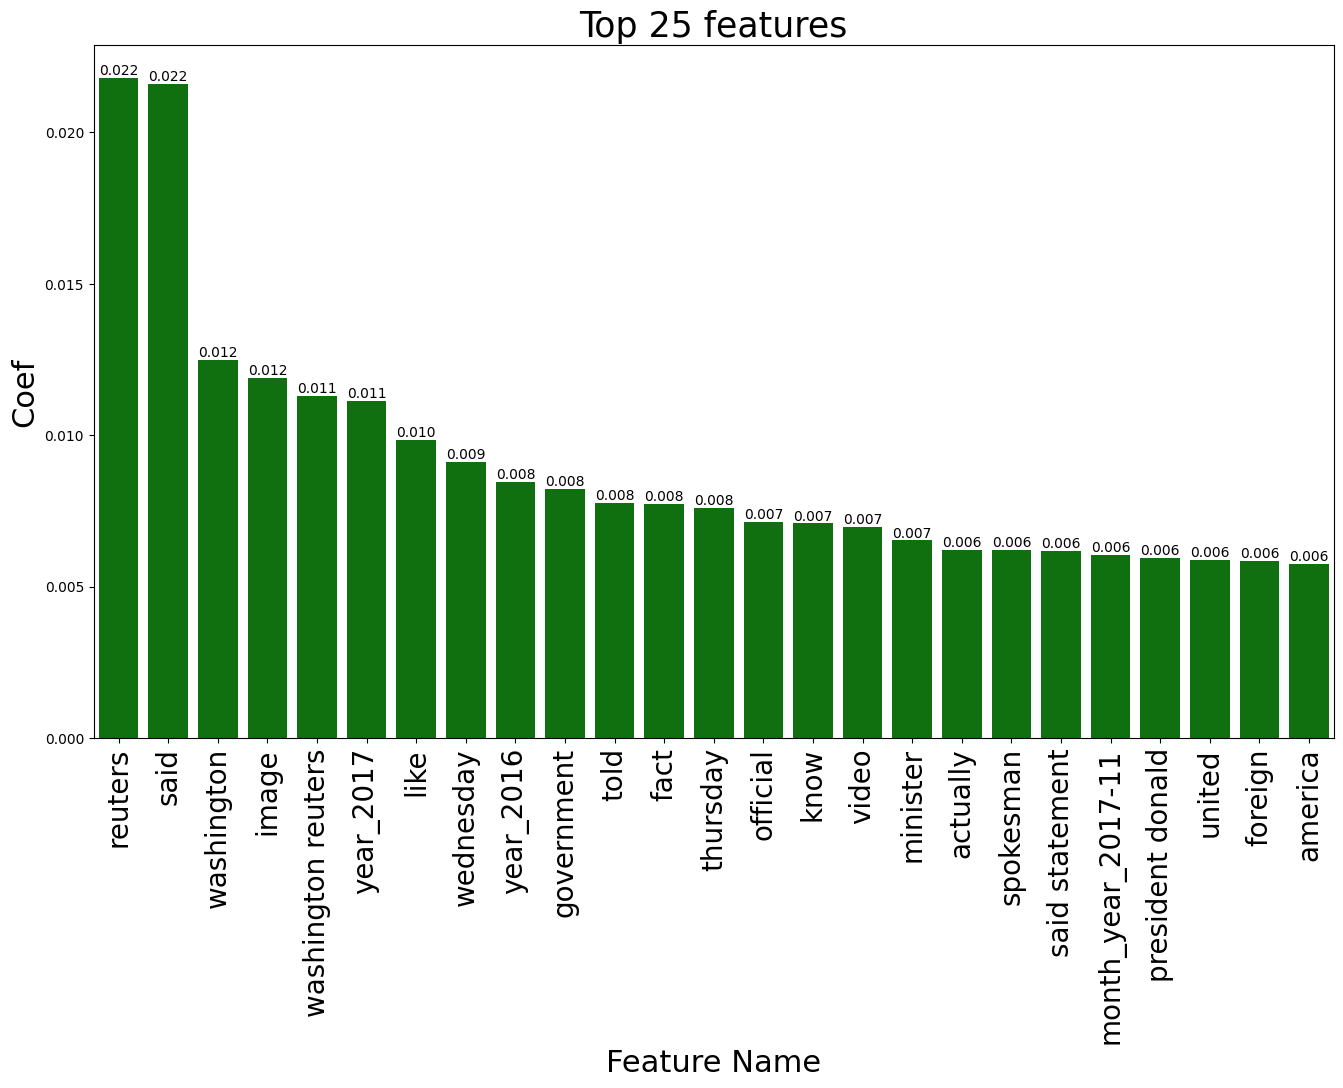

In [93]:
rf_feature_importance = rf_clf.feature_importances_
print(rf_feature_importance.shape)
feature_names = np.concatenate((date_feature_columns,tfidf_feature_names), axis = 0)
print(feature_names.shape)
get_feature_importance(feature_names, rf_feature_importance)

## Random Forest Classifier BOW


In [94]:
rf_clf.fit(X_train_final_bow,y_train)
print_score(rf_clf,X_train_final_bow,y_train,X_test_final_bow,y_test,train=False)

Test Result:

accuracy score: 0.9450

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.91      0.99      0.95      4694
        Real       0.98      0.90      0.94      4284

    accuracy                           0.94      8978
   macro avg       0.95      0.94      0.94      8978
weighted avg       0.95      0.94      0.94      8978


Confusion Matrix: 
 [[4631   63]
 [ 431 3853]]

ROC AUC score: 0.9936671941891372


(200051,)
(200051,)
          Feature     Value  abs_value colors
151403       said  0.018698   0.018698  green
146743    reuters  0.018615   0.018615  green
2       year_2017  0.016197   0.016197  green
79168       image  0.011400   0.011400  green
106872   minister  0.010315   0.010315  green


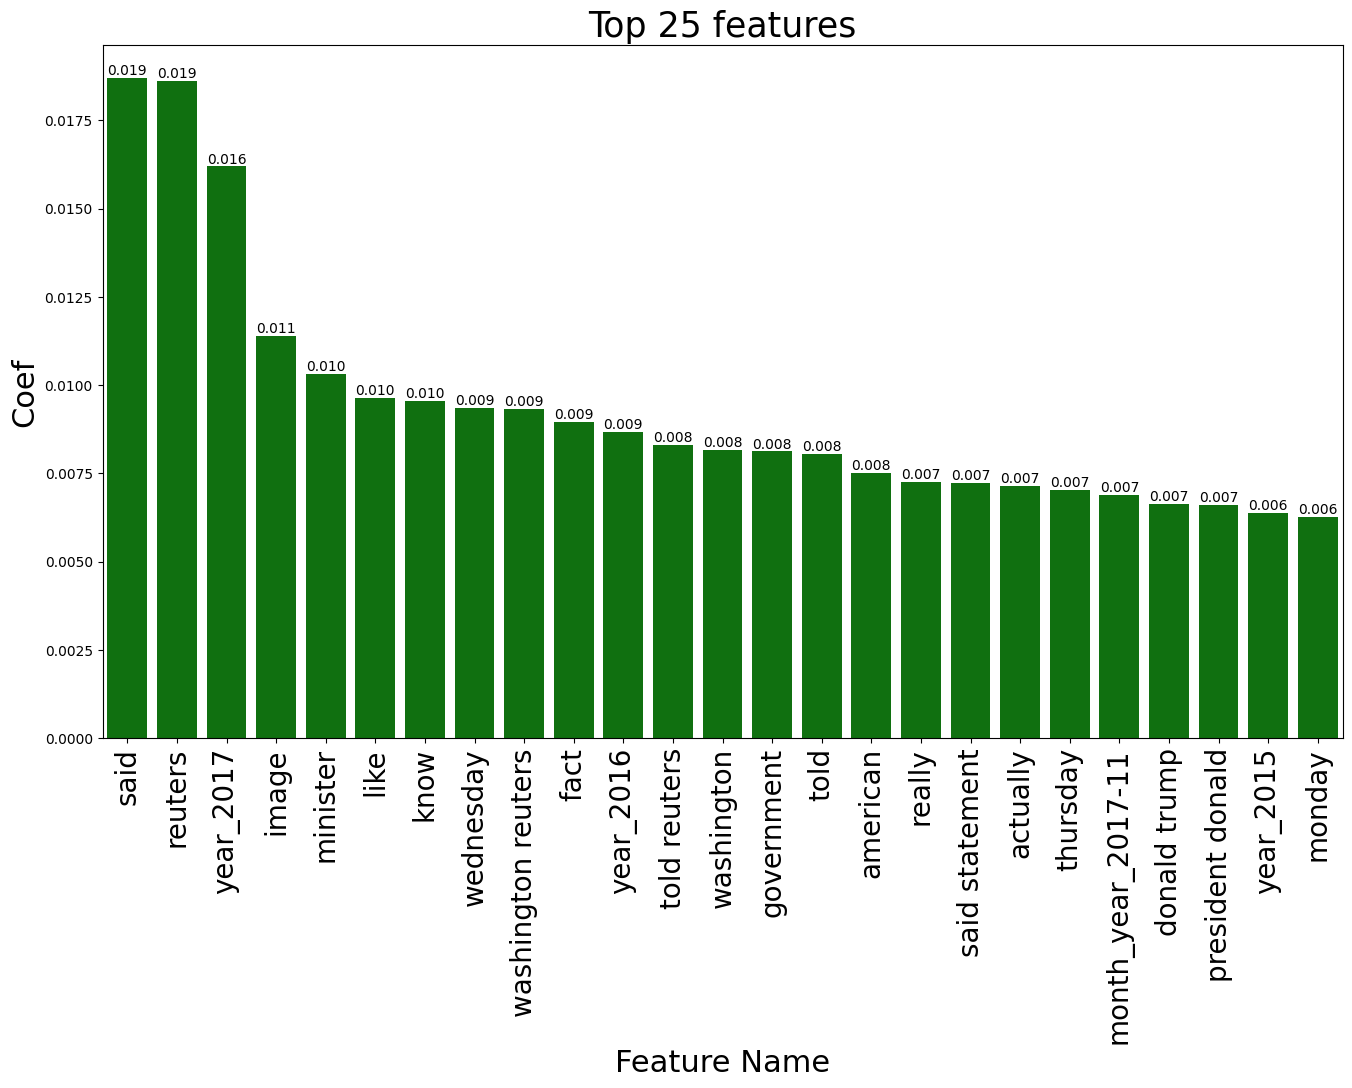

In [95]:
rf_feature_importance = rf_clf.feature_importances_
print(rf_feature_importance.shape)
feature_names = np.concatenate((date_feature_columns,bow_feature_names), axis = 0)
print(feature_names.shape)
get_feature_importance(feature_names, rf_feature_importance)

## Random Forest Classifier LDA

In [96]:
rf_clf.fit(X_train_final_lda,y_train)
print_score(rf_clf, X_train_final_lda, y_train, X_test_final_lda, y_test, train=False)

Test Result:

accuracy score: 0.9051

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.88      0.94      0.91      4694
        Real       0.93      0.86      0.90      4284

    accuracy                           0.91      8978
   macro avg       0.91      0.90      0.90      8978
weighted avg       0.91      0.91      0.90      8978


Confusion Matrix: 
 [[4425  269]
 [ 583 3701]]

ROC AUC score: 0.9684030052867617


### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500, random_state=42)

##### Logistic Regression TFIDF

In [103]:

lr.fit(X_train_final_tfidf,y_train)
print_score(lr, X_train_final_tfidf, y_train, X_test_final_tfidf, y_test, train=False)

Test Result:

accuracy score: 0.9874

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4694
        Real       0.99      0.99      0.99      4284

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978


Confusion Matrix: 
 [[4632   62]
 [  51 4233]]

ROC AUC score: 0.9991503844827236


                   Feature      Value  abs_value colors
146743             reuters  23.076232  23.076232  green
151403                said  19.849269  19.849269  green
192825  washington reuters  10.593080  10.593080  green
79168                image  -8.929037   8.929037    red
192613          washington   6.377169   6.377169  green


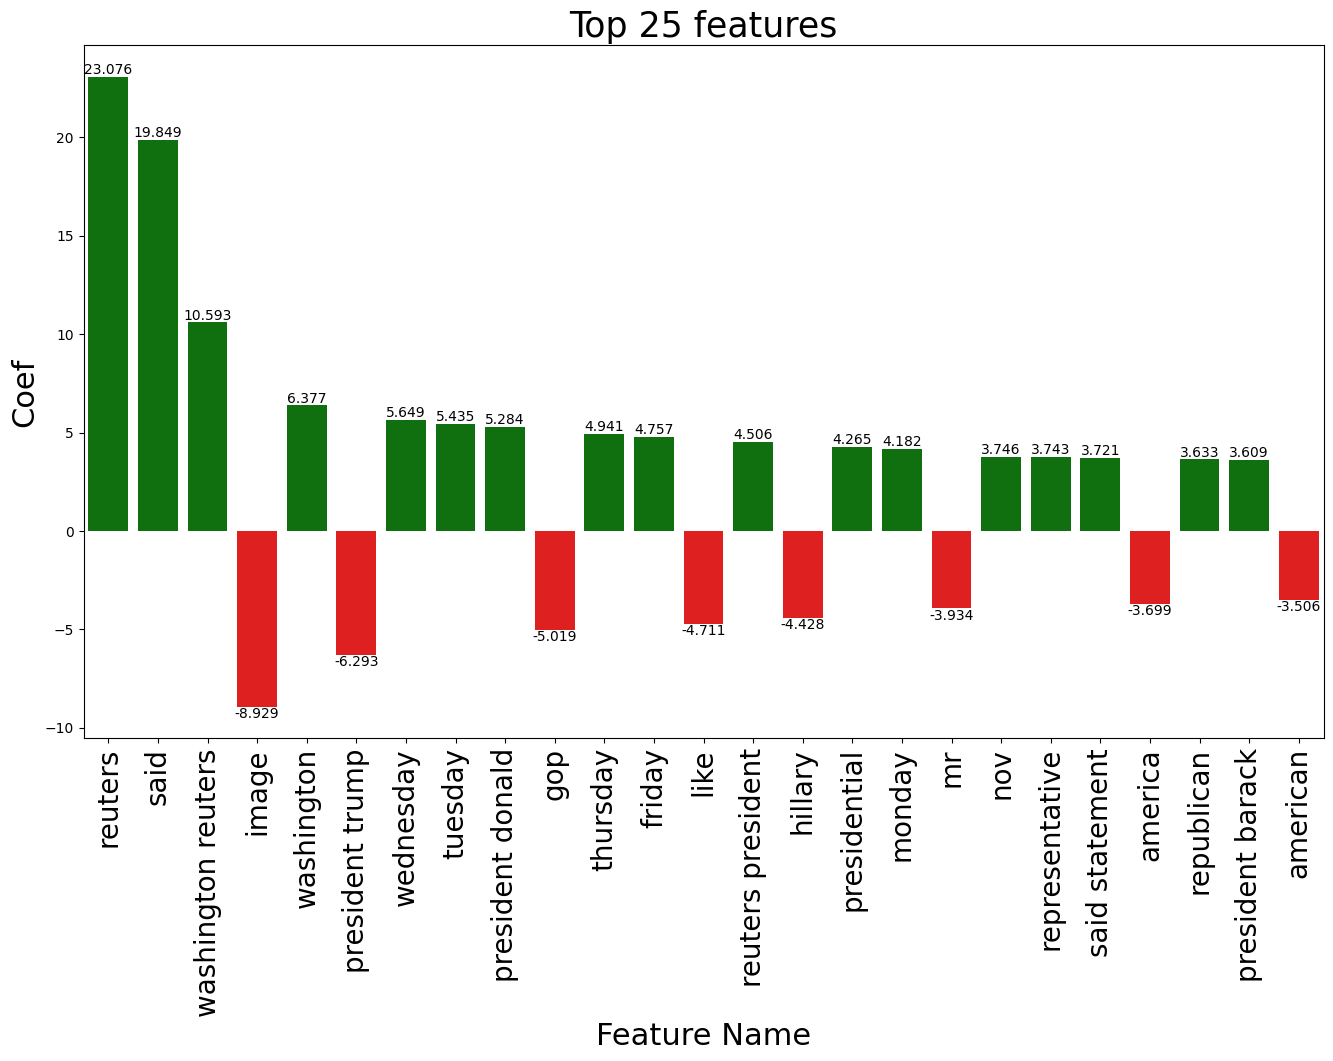

In [104]:
lr_coef = lr.coef_.T.flatten()
feature_names = np.concatenate((date_feature_columns,tfidf_feature_names), axis = 0)
get_feature_importance(feature_names, lr_coef)

#### Logistic Regression BOW

In [105]:

lr.fit(X_train_final_bow,y_train)
print_score(lr, X_train_final_bow, y_train, X_test_final_bow, y_test, train=False)

Test Result:

accuracy score: 0.9962

Classification Report: 
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4694
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978


Confusion Matrix: 
 [[4668   26]
 [   8 4276]]

ROC AUC score: 0.9985262639354847


                   Feature     Value  abs_value colors
146743             reuters  7.406141   7.406141  green
192825  washington reuters  2.002408   2.002408  green
0                year_2015 -1.156328   1.156328    red
2                year_2017  1.148575   1.148575  green
79168                image -1.101878   1.101878    red


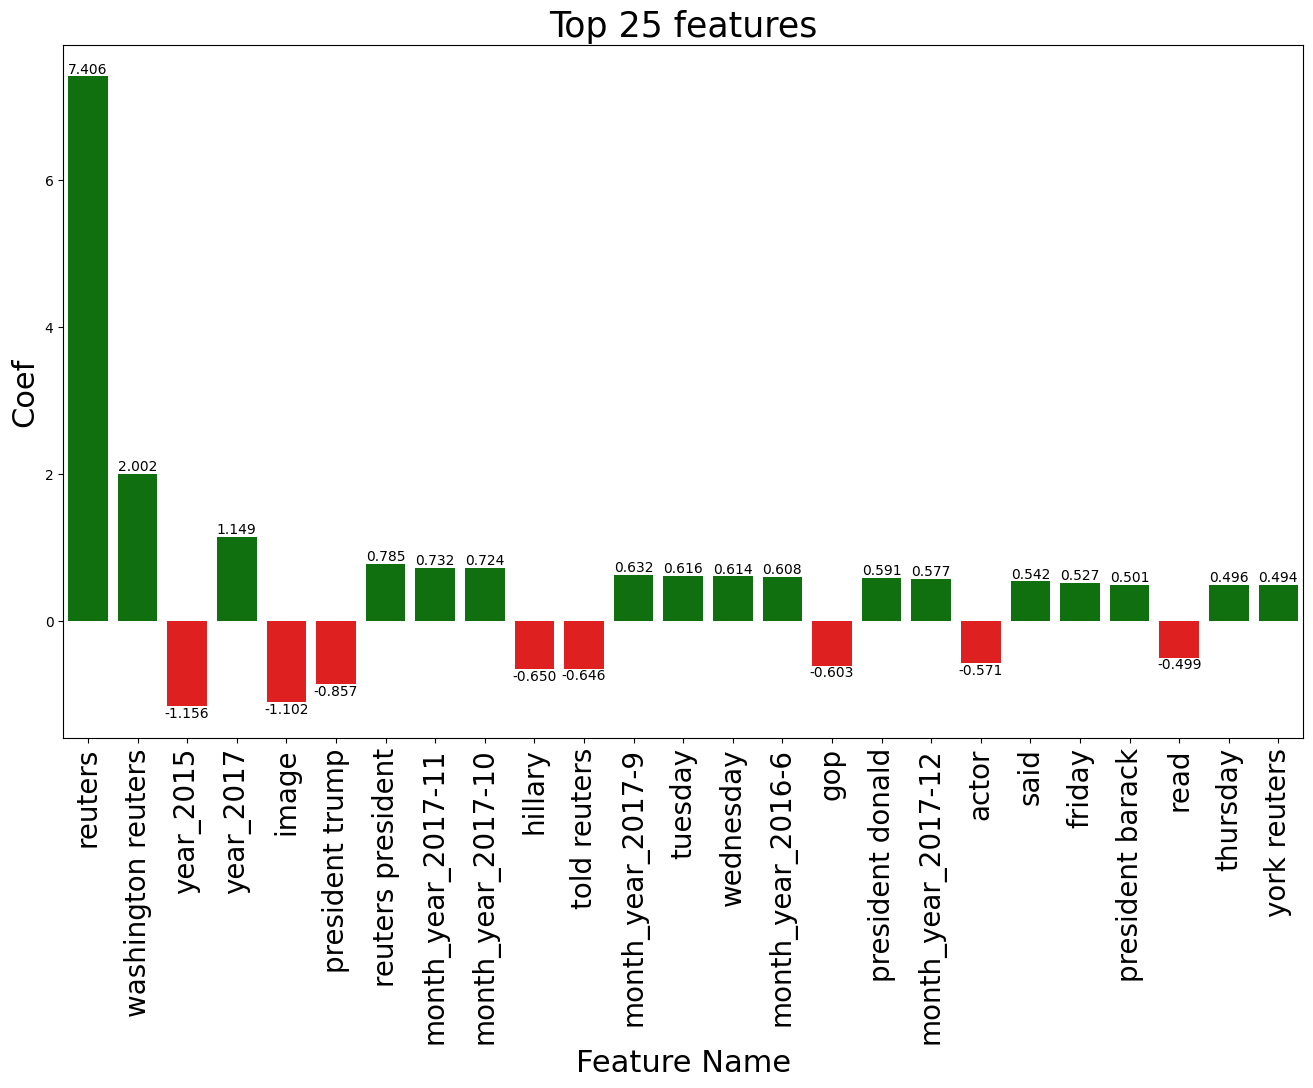

In [106]:
lr_coef = lr.coef_.T.flatten()
feature_names = np.concatenate((date_feature_columns,bow_feature_names), axis = 0)
get_feature_importance(feature_names, lr_coef)

#### Logistic Regression LDA

In [107]:

lr.fit(X_train_final_lda,y_train)
print_score(lr, X_train_final_lda, y_train, X_test_final_lda, y_test, train=False)

Test Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.90      0.92      0.91      4694
        Real       0.91      0.88      0.90      4284

    accuracy                           0.90      8978
   macro avg       0.90      0.90      0.90      8978
weighted avg       0.90      0.90      0.90      8978


Confusion Matrix: 
 [[4323  371]
 [ 493 3791]]

ROC AUC score: 0.9678540994582752
